In [110]:
import pandas as pd
import numpy as np
import json

In [111]:
policy_data = pd.read_csv('korean_blood_policies_raw.csv')
policy_data.head()

,content_eng,content_ko,type,target_audience,duration,size,frequency,collaboration,city_labeled,city,start_date,end_date
0,"Over 3000 blood donors, recipients, volunteers...","헌혈자 대축제가 2005년 6월 11일 여의도 공원에서 헌혈자와 수혈자, 봉사 원 ...",public event,citizen,single day,national,ad hoc,"celebrity, media",Central Seoul,NaN,2005.06.11,NaN
1,Internaltional Poster Contest on Voluntary Non...,대한적십자사 창립100주년을 맞아 아시아·태평양지역에 헌혈의 중요성을 알리기 위해 ...,competition,teenagers,months long,international,ad hoc,government,none,NaN,2005.05,2005.08
2,Blood Donor Walkathon to celebrate 100th anniv...,"대한적십자사 창립 100주년을 기념하고, 헌혈을 통해 이웃 사랑 실천에 앞장서고 있...",public event,citizen,single day,local,ad hoc,"celebrity, community",Central Seoul,NaN,2005.04.19,NaN
3,Blood Services Headquarters of the Korean Red ...,대한적십자사 혈액관리본부에서는 7월 한 달 동안‘숨겨진 헌혈횟수를 찾아드립니다’이벤...,public event,citizen,months long,national,ad hoc,none,none,NaN,2005.07,NaN
4,The Korean Red Cross and the Traffic channel T...,대한적십자사는 TBS 교통방송과 공동으로‘헌혈로 사랑을 등록하세요 - 교통방송과 함...,broadcast campaigns,citizen,single day,national,ad hoc,media,Central Seoul,NaN,2005.02.25,NaN


In [112]:
print(policy_data['type'].unique())
print(policy_data['type'].unique().__len__())


['public event' 'competition' 'broadcast campaigns' 'policy reform'
 'infrastructure improvement' 'conference' 'corporation event'
 'community event' 'partnership' 'internal event' 'government event']
11


In [113]:
print(policy_data['target_audience'].unique())
print(policy_data['target_audience'].unique().__len__())

['citizen' 'teenagers' 'institutions' 'blood donors' 'corporations'
 'university' 'hospital' 'community' 'government']
9


In [114]:
print(policy_data["duration"].unique())
print(policy_data["size"].unique())
print(policy_data["frequency"].unique())
print(policy_data["collaboration"].unique())

['single day' 'months long' 'ongoing' 'multi day']
['national' 'international' 'local']
['ad hoc' 'yearly' 'monthly']
['celebrity, media' 'government' 'celebrity, community' 'none' 'media'
 'community' 'media, celebrity' 'corporation' 'university' 'hospital'
 'government, corporation' 'celebrity' 'government, celebrity'
 'hospital, community, celebrity' 'media, corporation, community'
 'media, community' 'university, corporation' 'celebrity, government'
 'government, university' 'university, hospital' 'government, community'
 'government, university, corporation']


## Todo

1. We have to create data with year month end_year end_month index

In [115]:
# iterate to create new csv

# empty_csv = pd.DataFrame(columns=["year", "month", "day", "city" \
#                                   "end_year", "end_month", "index"\
#                                   'type', 'target_audience', 'duration', 'size', 'frequency', 'collaboration'])
empty_data = []
for index, row in policy_data.iterrows():
    cities = row["city_labeled"].split(",")
    start_date = row["start_date"].split(",")
    end_date = None
    if row["end_date"] is not np.nan:
        end_date = row["end_date"].split(",")
    has_no_city = False
    if cities[0] == "none":
        has_no_city = True
    has_multiple_cities = False
    if len(cities) > 1:
        has_multiple_cities = True
    has_end_date = False
    if end_date is not None and len(end_date) > 1:
        has_end_date = True
    has_multiple_start_dates = False
    if len(start_date) > 1:
        has_multiple_start_dates = True

    make_multiple_rows = False


    base_data = {
        "content_eng": row["content_eng"],
        "content_ko": row["content_ko"],
        "type": row["type"],
        "target_audience": row["target_audience"],
        "duration": row["duration"],
        "size": row["size"],
        "frequency": row["frequency"],
        "year": start_date[0].split(".")[0],
        "month": start_date[0].split(".")[1] if start_date[0].split(".")[1][0] != "0" else start_date[0].split(".")[1][1],
        "index": index # this is the index of the row in the original csv
    }
    if len(start_date[0].split(".")) > 2:
        base_data["day"] = start_date[0].split(".")[2]

    # check colab
    if row["collaboration"].split(",")[0] != "none":
        base_data["collaboration"] = row["collaboration"]
    if has_end_date:
        base_data["end_year"] = end_date[0].split(".")[0]
        month = end_date[0].split(".")[1]
        # remove the "0" in the beginning if it exists
        if month[0] == "0":
            month = month[1]
        base_data["end_month"] = month

        if len(end_date[0].split(".")) > 2:
            base_data["end_day"] = end_date[0].split(".")[2]
    
    if has_multiple_cities:
        for city in cities:
            copied_base_data = base_data.copy()
            copied_base_data["city"] = city.strip()
            empty_data.append(copied_base_data)
    else:
        if has_no_city:
            empty_data.append(base_data)
        else:
            base_data["city"] = cities[0].strip()
            empty_data.append(base_data)

    if has_multiple_start_dates:
        for i in range(1, len(start_date)):
            # we already added the first date so we skip it
            date = start_date[i]
            copied_base_data = base_data.copy()
            copied_base_data["year"] = date.split(".")[0]
            month = date.split(".")[1]
            # remove the "0" in the beginning if it exists
            if month[0] == "0":
                month = month[1]
            copied_base_data["month"] = month
            # check if there is end date too
            if has_end_date:
                copied_base_data["end_year"] = end_date[i].split(".")[0]
                month = end_date[i].split(".")[1]
                # remove the "0" in the beginning if it exists
                if month[0] == "0":
                    month = month[1]
                copied_base_data["end_month"] = month
                if len(end_date[i].split(".")) > 2:
                    copied_base_data["end_day"] = end_date[i].split(".")[2]
            if len(date.split(".")) > 2:
                copied_base_data["day"] = date.split(".")[2]
            empty_data.append(copied_base_data)
            # empty_csv = empty_csv.append(copied_base_data, ignore_index=True)

# make empty_data to csv
empty_csv = pd.DataFrame(empty_data)



In [116]:
print(empty_csv.head())
empty_csv.to_csv("korean_blood_policies_preprocessed.csv", index=False)

                                         content_eng  \
0  Over 3000 blood donors, recipients, volunteers...   
1  Internaltional Poster Contest on Voluntary Non...   
2  Blood Donor Walkathon to celebrate 100th anniv...   
3  Blood Services Headquarters of the Korean Red ...   
4  The Korean Red Cross and the Traffic channel T...   

                                          content_ko                 type  \
0  헌혈자 대축제가 2005년 6월 11일 여의도 공원에서 헌혈자와 수혈자, 봉사 원 ...         public event   
1  대한적십자사 창립100주년을 맞아 아시아·태평양지역에 헌혈의 중요성을 알리기 위해 ...          competition   
2  대한적십자사 창립 100주년을 기념하고, 헌혈을 통해 이웃 사랑 실천에 앞장서고 있...         public event   
3  대한적십자사 혈액관리본부에서는 7월 한 달 동안‘숨겨진 헌혈횟수를 찾아드립니다’이벤...         public event   
4  대한적십자사는 TBS 교통방송과 공동으로‘헌혈로 사랑을 등록하세요 - 교통방송과 함...  broadcast campaigns   

  target_audience     duration           size frequency  year month  index  \
0         citizen   single day       national    ad hoc  2005     6      0   
1       teenagers  months long  internationa

In [117]:
start_months = empty_csv["month"].unique().astype(int).tolist()
start_months.sort()
print(start_months)

end_months = empty_csv["end_month"].unique()
print(end_months)

start_years = empty_csv["year"].unique().astype(int).tolist()
start_years.sort()
print(start_years)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[nan '5' '11']
[2005, 2006, 2007, 2007, 2008, 2008, 2009, 2009, 2010, 2010, 2011, 2011, 2012, 2012, 2013, 2013, 2014, 2014, 2015, 2016, 2016, 2017, 2018, 2018, 2019, 2020, 2020, 2021, 2021, 2022, 2022, 2023]


<Axes: xlabel='month'>

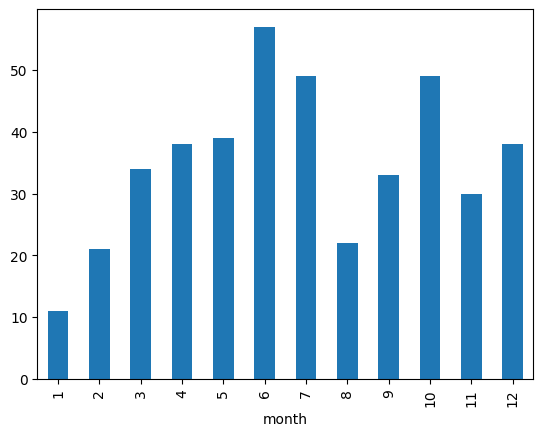

In [118]:
# Let us visualize the data by the sheer amount of events that have the same month

sorted_months = empty_csv["month"].astype(int).value_counts().sort_index()
sorted_months.plot(kind='bar')


<Axes: xlabel='year'>

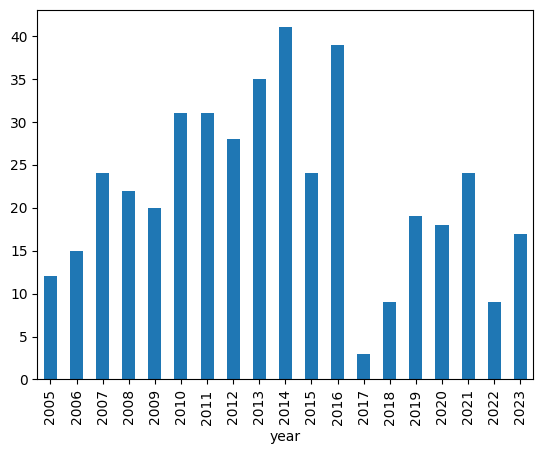

In [119]:
# yearly plot
sorted_years = empty_csv["year"].astype(int).value_counts().sort_index()
sorted_years.plot(kind='bar')

<Axes: xlabel='city'>

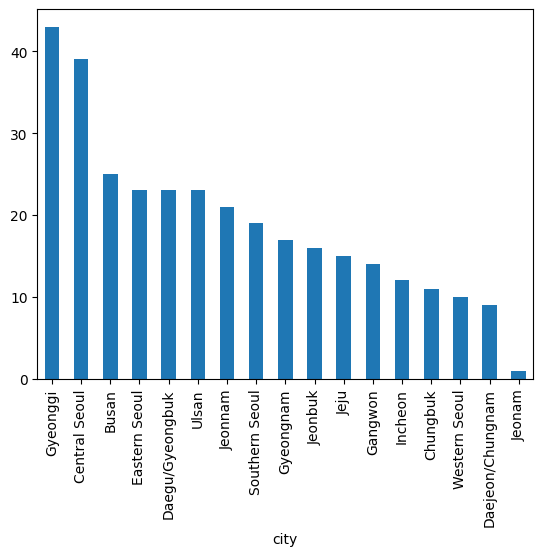

In [120]:
sorted_city = empty_csv["city"].value_counts().sort_values(ascending=False)
sorted_city.plot(kind='bar')

<Axes: xlabel='type'>

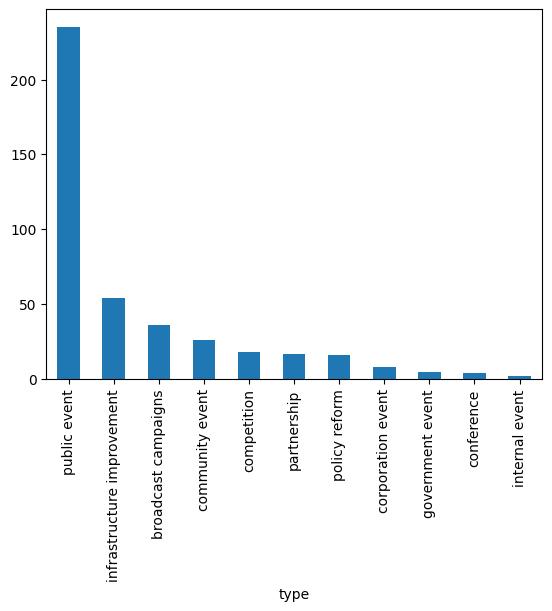

In [121]:
# type of events
sorted_type = empty_csv["type"].value_counts().sort_values(ascending=False)
sorted_type.plot(kind='bar')

<Axes: xlabel='target_audience'>

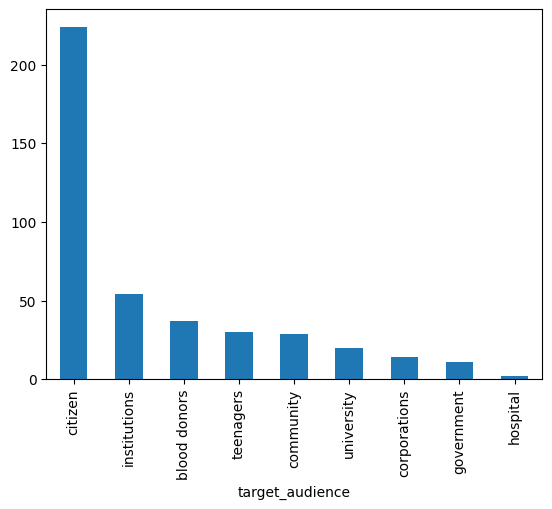

In [122]:
# target audience
sorted_target_audience = empty_csv["target_audience"].value_counts().sort_values(ascending=False)
sorted_target_audience.plot(kind='bar')

<Axes: xlabel='duration'>

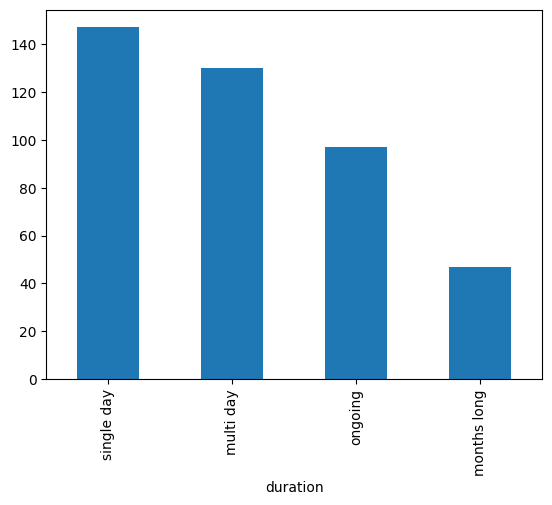

In [123]:
# duration
sorted_duration = empty_csv["duration"].value_counts().sort_values(ascending=False)
sorted_duration.plot(kind='bar')

<Axes: xlabel='size'>

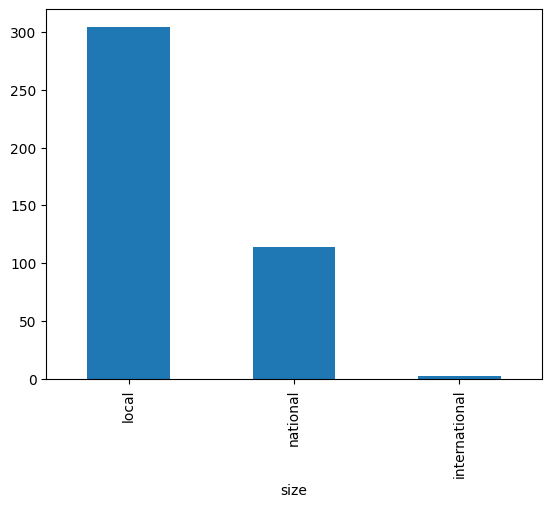

In [124]:
# size
sorted_size = empty_csv["size"].value_counts().sort_values(ascending=False)
sorted_size.plot(kind='bar')

<Axes: xlabel='frequency'>

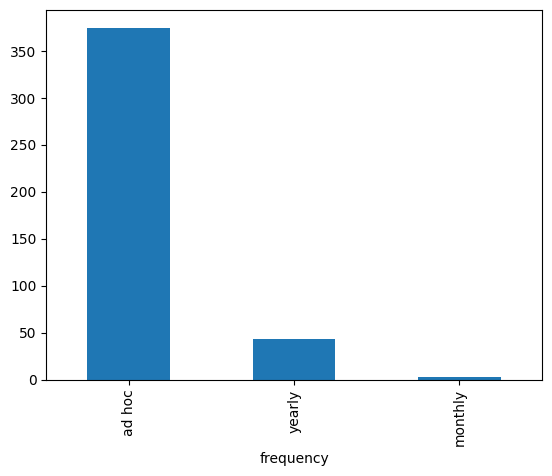

In [125]:
# frequency
sorted_frequency = empty_csv["frequency"].value_counts().sort_values(ascending=False)
sorted_frequency.plot(kind='bar')

<Axes: >

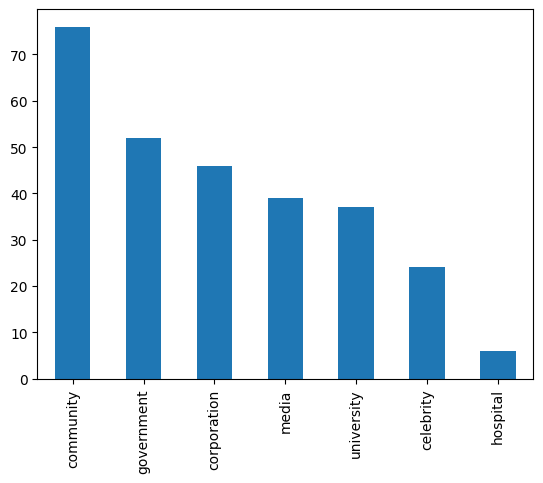

In [126]:
# collaboration
colab_dict = {}
colabs = empty_csv["collaboration"]

for colab in colabs:
    if colab is not np.nan:
        colab = colab.split(",")
        for c in colab:
            c = c.strip()
            if c in colab_dict:
                colab_dict[c] += 1
            else:
                colab_dict[c] = 1
# plot the collaboration
colab_df = pd.DataFrame(colab_dict, index=[0])
colab_df = colab_df.transpose()
colab_df.columns = ["count"]
sorted_colab = colab_df["count"].sort_values(ascending=False)
sorted_colab.plot(kind='bar')